<a href="https://colab.research.google.com/github/zyf2021/freeCodeCamp/blob/main/Page_View_Time_Series_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np

установим индекс по колонке date

In [3]:
df = pd.read_csv('/content/drive/MyDrive/fcc-forum-pageviews.csv')
df = df.set_index('date')

Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [4]:
df.sort_values(by = ['value'], ascending=False)

,value
date,
2019-06-17,1173655
2019-06-18,1166225
2019-08-07,341595
2019-08-06,337325
2019-11-15,314101
...,...
2016-05-15,2927
2016-05-16,2591
2016-05-10,2329


In [5]:
df = df.sort_values(by = ['value'], ascending=False)
lim = round(len(df) * 0.025)
df = df.iloc[lim:-lim]
df = df.sort_values(by = ['date'])

Daily freeCodeCamp Forum Page Views 5/2016-12/2019

Date

Page View

In [6]:
import matplotlib.pyplot as plt

In [7]:
df.columns.tolist()

['value']

<Figure size 640x480 with 0 Axes>

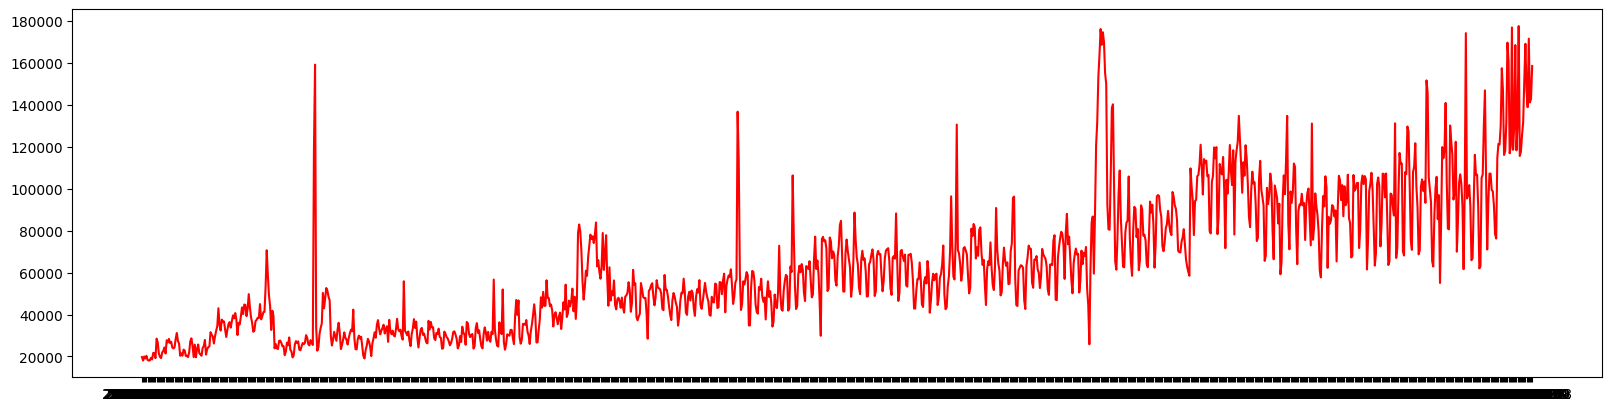

In [10]:
fig = plt.figure()
fig, ax = plt.subplots(figsize = (16, 4), layout='constrained')
ax.set_xlabel = 'Date'
ax.set_ylabel = 'PageViews'
ax.set_title = 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'
ax.plot(df['value'], color='red')


#plt.plot(df)
#plt.show()

попробуем нормально...

In [18]:
from datetime import datetime

In [16]:
def date_parser(x):
  return datetime.strptime(x, "%Y-%m-%d")

In [27]:
df_2 = pd.read_csv('/content/drive/MyDrive/fcc-forum-pageviews.csv')
df_2['date'] = df_2['date'].apply(date_parser)
df_2 = df_2.set_index('date')
df = df.loc[
    (df["value"] >= df["value"].quantile(0.025))
    & (df["value"] <= df["value"].quantile(0.975))
]


In [25]:
df_2 = df_2.loc[(df_2.value <= df.value.quantile(0.025)) & (df.value >= df.value.quantile(0.975))]

In [40]:
df = df_2.groupby(pd.Grouper(freq="M")).mean().rename(columns={"value": "avg"})

<ipython-input-40-6d48322403e9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_2.groupby(pd.Grouper(freq="M")).mean().rename(columns={"value": "avg"})


In [41]:
df_2["year"] = pd.DatetimeIndex(df_2.index).year
df_2["month"] = pd.DatetimeIndex(df_2.index).strftime("%B")

In [42]:
df_2

,value,year,month
date,,,
2016-05-09,1201,2016,May
2016-05-10,2329,2016,May
2016-05-11,1716,2016,May
2016-05-12,10539,2016,May
2016-05-13,6933,2016,May
...,...,...,...
2019-11-29,171584,2019,November
2019-11-30,141161,2019,November
2019-12-01,142918,2019,December


In [43]:
df_2 = pd.melt(
        df_2,
        id_vars=["year", "month"],
        value_vars=["value"],
    )

<ipython-input-43-c36bdfe126e1>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_2 = pd.melt(


In [44]:
import seaborn as sns

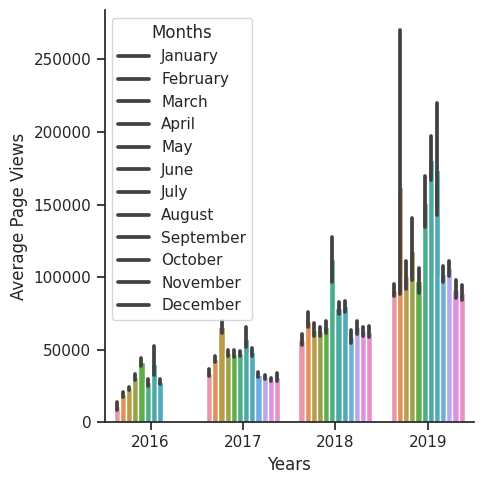

In [47]:
sns.set_theme(style="ticks")
# Draw the chart
fig = sns.catplot(
    data=df_2,
    x="year",
    y="value",
    hue="month",
    kind="bar",
    legend=False,
)
# Config legend, axes and title
fig.set_xlabels("Years")
fig.set_ylabels("Average Page Views")
plt.legend(
    title="Months",
    loc="upper left",
    labels=[
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ],
)

In [50]:
def parse_date(x):
    return datetime.strptime(x, "%Y-%m-%d")

In [51]:
df = pd.read_csv(
    '/content/drive/MyDrive/fcc-forum-pageviews.csv',
    index_col=["date"],
    parse_dates=["date"],
    date_parser=parse_date,
)

In [52]:
df = df.loc[
    (df["value"] >= df["value"].quantile(0.025))
    & (df["value"] <= df["value"].quantile(0.975))
]

In [54]:
df = df.groupby(pd.Grouper(freq="M")).mean().rename(columns={"value": "avg"})
df["year"] = pd.DatetimeIndex(df.index).year
df["month"] = pd.DatetimeIndex(df.index).strftime("%B")

In [57]:
df

,avg,year,month
date,,,
2016-05-31,19432.400000,2016,May
2016-06-30,21875.105263,2016,June
2016-07-31,24109.678571,2016,July
2016-08-31,31049.193548,2016,August
2016-09-30,41476.866667,2016,September
2016-10-31,27398.322581,2016,October
2016-11-30,40448.633333,2016,November
2016-12-31,27832.419355,2016,December
2017-01-31,32785.161290,2017,January


In [60]:
import matplotlib.ticker as mticker

[Text(0, 0, '0'),
 Text(0, 20000, '20000'),
 Text(0, 40000, '40000'),
 Text(0, 60000, '60000'),
 Text(0, 80000, '80000'),
 Text(0, 100000, '100000'),
 Text(0, 120000, '120000'),
 Text(0, 140000, '140000'),
 Text(0, 160000, '160000'),
 Text(0, 180000, '180000'),
 Text(0, 200000, '200000')]

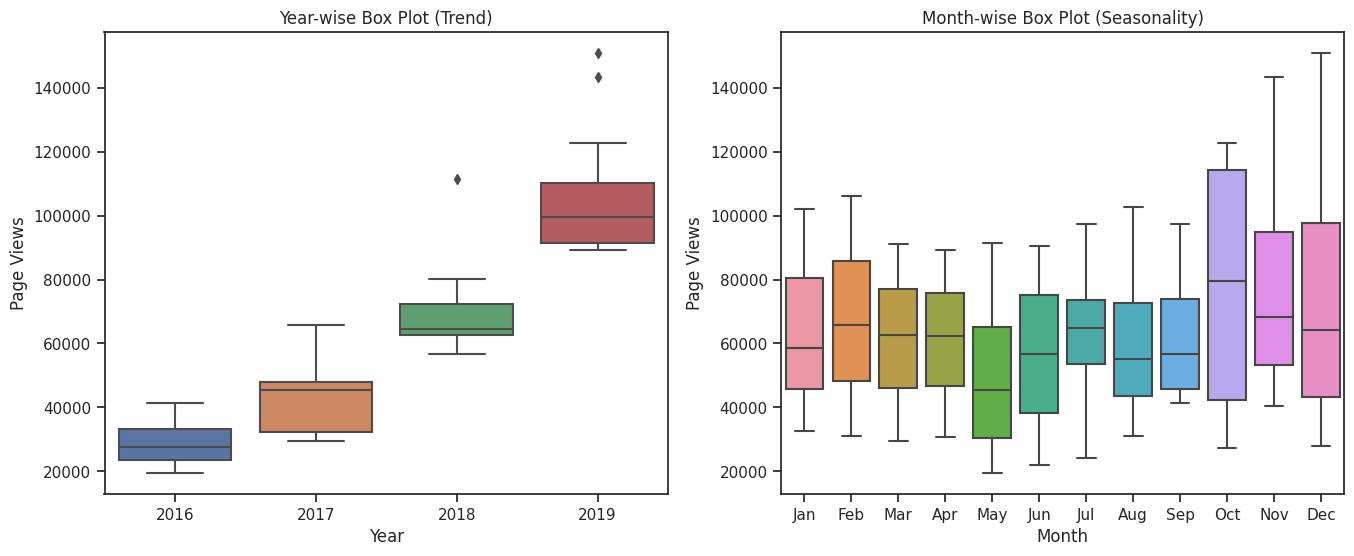

In [61]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box["year"] = [d.year for d in df_box.date]
df_box["month"] = [d.strftime("%b") for d in df_box.date]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(ax=ax1, data=df_box, x=df_box["year"], y=df_box["avg"])
# Remember to edit the labels after call to seaborn.
ax1.set(
    xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)"
)
sns.boxplot(
    ax=ax2,
    data=df_box,
    x=df_box["month"],
    y=df_box["avg"],
    order=[
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel("Month")
ax2.set_ylabel("Page Views")
# I'm cheating here, because I don't know why the test for y ticks label
# fail and I don't want to dig into seaborn source code.
y_ticks = [
    "0",
    "20000",
    "40000",
    "60000",
    "80000",
    "100000",
    "120000",
    "140000",
    "160000",
    "180000",
    "200000",
]
ax1.yaxis.set_major_locator(mticker.FixedLocator([int(s) for s in y_ticks]))
ax1.set_yticklabels(y_ticks)